In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 


import matplotlib
matplotlib.rcParams.update({'font.size': 25})
sns.set_theme(style="whitegrid", font_scale=2)

In [2]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "Other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Visible neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph neural network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Other",
    'ensemble (MAE)':"Other",
    'fuzzy network':"Other",
    'Gaussian-Proces':"Other",
    'PCA-like':"Other",
    'LSTM':'Other',
    'ANN':"Dense neural network",
    'VNN (CNN)':"Visible neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Convolutional neural network",
    'Dense neural network':"Dense neural network",
    #'Transformer':"",
    'Capsule Network':"Other",
    'Factor Graph Neural Network':"Graph neural network",
    'Self-organising maps (SOM)':"Other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph neural network",
    'meta-learning':"Other",
    'Generative adversarial network (GAN)':"Other"
}

sns.set_theme(style="whitegrid", font_scale=1.3)

In [3]:
outPath = "figures"

In [4]:
pd_table1 = pd.read_csv("data/Table_5.csv")

In [5]:
df = pd_table1[["Year"]]
df = pd.DataFrame(df.value_counts()).sort_index().reset_index(level=[0])
df = df.rename({0:"count"}, axis=1)
df

,Year,count
0,1999,1
1,2002,1
2,2006,1
3,2007,1
4,2008,3
5,2017,1
6,2018,5
7,2019,6
8,2020,12
9,2021,32


# Summary plot over years

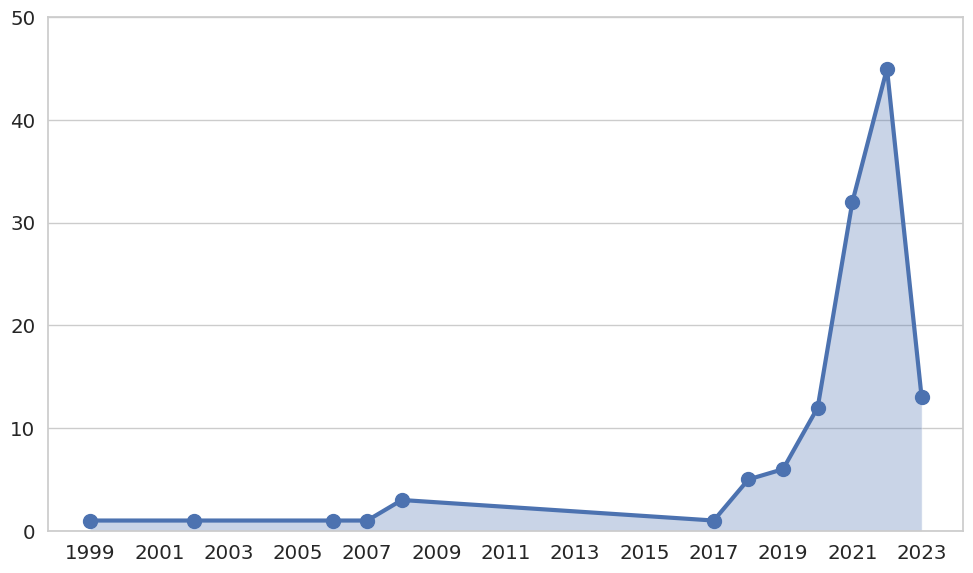

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df["Year"], df["count"], linewidth=3, marker='o', markersize = 10)
ax.fill_between(df["Year"], df["count"], y2=0, alpha=0.3)
plt.xticks(np.arange(min(df["Year"]), max(df["Year"])+1, 2.0))
ax.set_ylim(0, 50)
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig(f"{outPath}/trends.svg", dpi=300)

# Stackplot

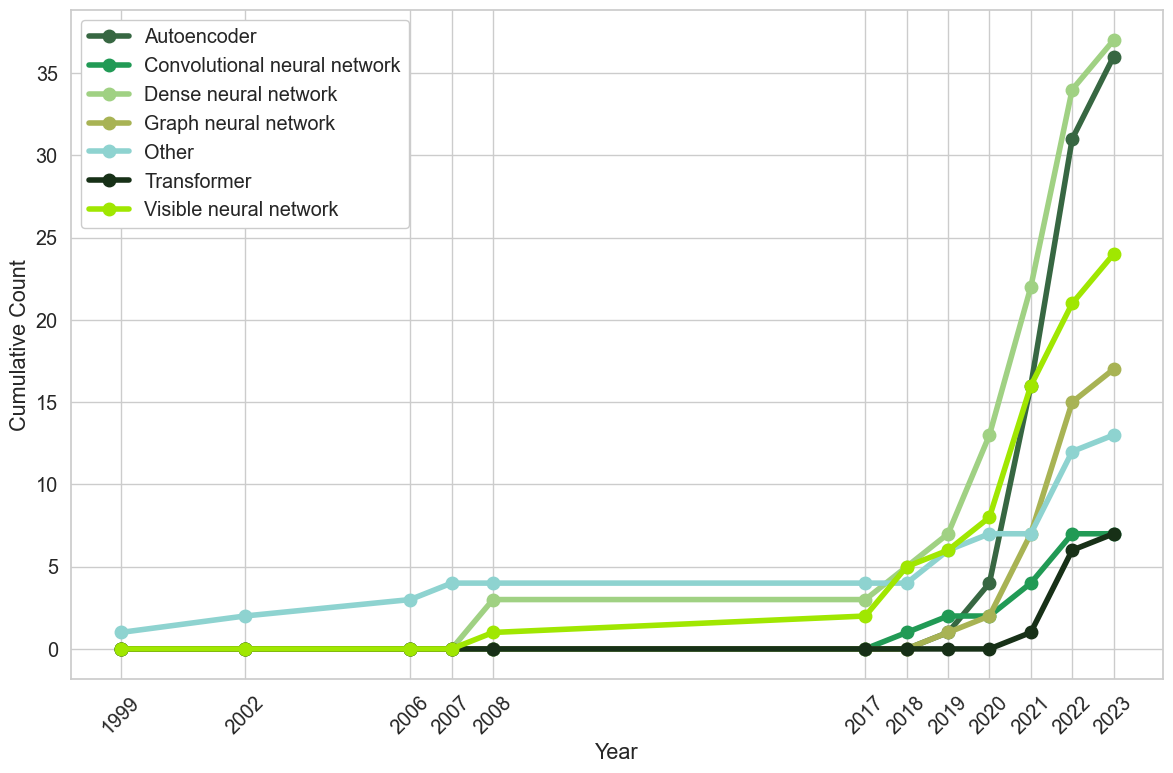

In [6]:
df = pd_table1[["Model architecture", "Year"]].copy()
df['Year'] = df['Year'].values.astype(int)
df = df.dropna()
df["Model architecture"] = df['Model architecture'].str.split(', ')
df = df.explode(["Model architecture"])
''' Coarser '''
df.replace(model_categories, inplace=True)
df

a= df.value_counts(normalize=False)
a = a.unstack().T
a.replace(np.nan, 0, inplace=True)
a

df = a

# Calculating the cumulative sum
cumulative_df = df.cumsum()

# Plotting
colors = ["#376742ff", "#219a55ff", "#a0d183ff", "#a8b354ff", "#8ed3d0ff", "#173017ff", "#a0e701ff"]
plt.figure(figsize=(12, 8))
for i,column in enumerate(cumulative_df.columns):
    plt.plot(cumulative_df.index, cumulative_df[column], label=column, marker='o', linewidth=4, markersize=9,color=colors[i])

#plt.title("Cumulative plot of network types over the years")
plt.xlabel("Year")
plt.ylabel("Cumulative Count")
plt.legend(framealpha=1)
plt.grid(True)
plt.xticks(cumulative_df.index, rotation=45)
plt.tight_layout()
plt.savefig(f"{outPath}/stacked_models_year_green.svg", dpi=300)
plt.savefig(f"{outPath}/stacked_models_year_green.png", dpi=300)
plt.show()

In [10]:
df = pd_table1[["Model architecture", "Year"]].copy()
df['Year'] = df['Year'].values.astype(int)
df = df.dropna()
df["Model architecture"] = df['Model architecture'].str.split(', ')
df = df.explode(["Model architecture"])
''' Coarser '''
df.replace(model_categories, inplace=True)
df['Model architecture'].value_counts()

Dense neural network            37
Autoencoder                     36
Visible neural network          24
Graph neural network            17
Other                           13
Convolutional neural network     7
Transformer                      7
Name: Model architecture, dtype: int64

In [43]:

df[df["Year"] > 2016].shape[0] / df.shape[0]

0.9432624113475178

In [42]:
df.shape[0]

141